In [1]:
# All the imports

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset into pd.dataframe

data = pd.read_csv('datasets/student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Overview of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
# Splitting the dataframe into 'train' and 'test' parts

x = data[["Hours"]]
y = data["Scores"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((20, 1), (5, 1))

In [5]:
# Normalization

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test) 

# Training the model

model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

# Error measuring

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 18.943211722315247
MAE: 3.9207511902099226
R^2: 0.963349391497095


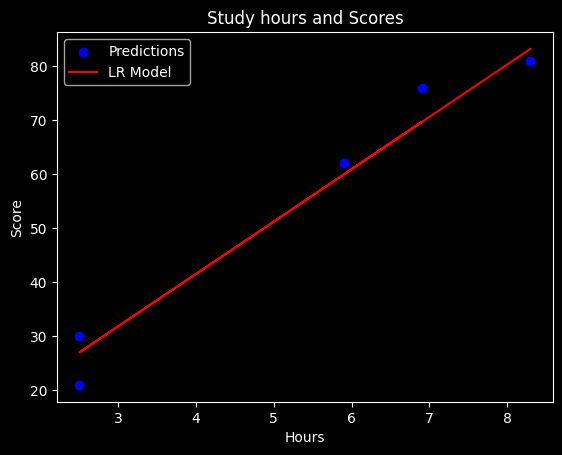

In [7]:
# Visualization

plt.style.use("dark_background")
plt.scatter(x_test, y_test, color='blue', label="Predictions")
plt.plot(x_test, y_pred, color='red', label="LR Model")
plt.title("Study hours and Scores")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.legend()
plt.show()